In [5]:

import os
import sys
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from IPython.display import Audio

import keras

In [6]:
Ravdess = "/home/kenterbery/projects/speech_emotion_recognition/input/Ravdess/audio_speech_actors_01-24/"
Crema = "/home/kenterbery/projects/speech_emotion_recognition/input/Crema/"
Savee = "/home/kenterbery/projects/speech_emotion_recognition/input/Savee/"
Tess = "/home/kenterbery/projects/speech_emotion_recognition/input/Tess/"

Ravdess dataset

In [7]:
ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        emotion = int(info[2])
        emotion_df.append((emotion, Ravdess + dir + "/" + wav))

In [8]:
Ravdess_df = pd.DataFrame.from_dict(emotion_df)
Ravdess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

In [9]:
Ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotion,Path
0,neutral,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,disgust,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...


Crema dataset


In [10]:
emotion_df = []

for wav in os.listdir(Crema):
    info = wav.partition(".wav")[0].split("_")
    if info[2] == 'SAD':
        emotion_df.append(("sad", Crema + wav))
    elif info[2] == 'ANG':
        emotion_df.append(("angry", Crema + wav))
    elif info[2] == 'DIS':
        emotion_df.append(("disgust", Crema + wav))
    elif info[2] == 'FEA':
        emotion_df.append(("fear", Crema + wav))
    elif info[2] == 'HAP':
        emotion_df.append(("happy", Crema + wav))
    elif info[2] == 'NEU':
        emotion_df.append(("neutral", Crema + wav))
    else:
        emotion_df.append(("unknown", Crema + wav))


Crema_df = pd.DataFrame.from_dict(emotion_df)
Crema_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Crema_df.head()

,Emotion,Path
0,disgust,/home/kenterbery/projects/speech_emotion_recog...
1,happy,/home/kenterbery/projects/speech_emotion_recog...
2,sad,/home/kenterbery/projects/speech_emotion_recog...
3,happy,/home/kenterbery/projects/speech_emotion_recog...
4,neutral,/home/kenterbery/projects/speech_emotion_recog...


TESS dataset

In [11]:
tess_directory_list = os.listdir(Tess)

emotion_df = []

for dir in tess_directory_list:
    for wav in os.listdir(Tess + dir):
        info = wav.partition(".wav")[0].split("_")
        emo = info[2]
        if emo == "ps":
            emotion_df.append(("surprise", Tess + dir + "/" + wav))
        else:
            emotion_df.append((emo, Tess + dir + "/" + wav))


Tess_df = pd.DataFrame.from_dict(emotion_df)
Tess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Tess_df.head()

,Emotion,Path
0,sad,/home/kenterbery/projects/speech_emotion_recog...
1,sad,/home/kenterbery/projects/speech_emotion_recog...
2,sad,/home/kenterbery/projects/speech_emotion_recog...
3,sad,/home/kenterbery/projects/speech_emotion_recog...
4,sad,/home/kenterbery/projects/speech_emotion_recog...


In [12]:
savee_directiory_list = os.listdir(Savee)

emotion_df = []

for wav in savee_directiory_list:
    info = wav.partition(".wav")[0].split("_")[1].replace(r"[0-9]", "")
    emotion = re.split(r"[0-9]", info)[0]
    if emotion=='a':
        emotion_df.append(("angry", Savee + wav))
    elif emotion=='d':
        emotion_df.append(("disgust", Savee + wav))
    elif emotion=='f':
        emotion_df.append(("fear", Savee + wav))
    elif emotion=='h':
        emotion_df.append(("happy", Savee + wav))
    elif emotion=='n':
        emotion_df.append(("neutral", Savee + wav))
    elif emotion=='sa':
        emotion_df.append(("sad", Savee + wav))
    else:
        emotion_df.append(("surprise", Savee + wav))


Savee_df = pd.DataFrame.from_dict(emotion_df)
Savee_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Savee_df.head()

,Emotion,Path
0,sad,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,angry,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...


In [13]:
df = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
df.shape

(12162, 2)

In [14]:
df.head()

,Emotion,Path
0,neutral,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,disgust,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...


In [15]:
%matplotlib inline

plt.style.use("ggplot")

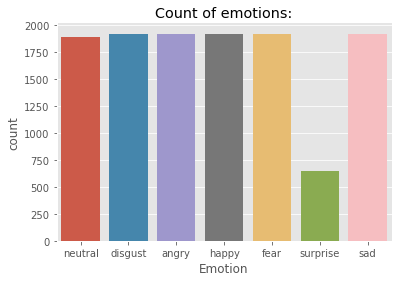

In [16]:
plt.title("Count of emotions:")
sns.countplot(x=df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [17]:
df.head(10)

,Emotion,Path
0,neutral,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,disgust,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...
5,angry,/home/kenterbery/projects/speech_emotion_recog...
6,angry,/home/kenterbery/projects/speech_emotion_recog...
7,happy,/home/kenterbery/projects/speech_emotion_recog...
8,fear,/home/kenterbery/projects/speech_emotion_recog...
9,angry,/home/kenterbery/projects/speech_emotion_recog...


In [24]:
def create_spectrogram_plot(data, output_path):
    # X = librosa.stft(data)
    # Xdb = librosa.amplitude_to_db(abs(X), ref=np.max)

    # For plotting headlessly
    from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
    # fig = plt.Figure()
    # canvas = FigureCanvas(fig)
    # ax = fig.add_subplot(111)
    # librosa.display.specshow(Xdb, cmap="gray_r")
    # fig.savefig(output_path)

    fig = plt.Figure()
    # canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = librosa.display.specshow(Xdb, ax=ax, cmap="magma",)
    fig.savefig(output_path,  bbox_inches='tight', pad_inches=0)
#
#
def create_spectrogram(data, sr):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X), ref=np.max)

    return Xdb

def create_mel_spectrogram(data, sr):
    melspec = librosa.feature.melspectrogram(data, sr=sr, n_mels=128)
    melspec = librosa.power_to_db(melspec).astype(np.float32)

    return melspec

/home/kenterbery/anaconda3/envs/speech_emotion_recognition/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/kenterbery/anaconda3/envs/speech_emotion_recognition/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


array([[-13.458101 , -16.44117  , -16.171364 , ..., -99.       ,
        -99.       , -99.       ],
       [ -9.831385 , -15.019043 , -17.799133 , ..., -99.       ,
        -99.       , -99.       ],
       [ -3.2410712,  -8.027384 , -12.685162 , ..., -99.       ,
        -99.       , -99.       ],
       ...,
       [-50.61589  , -55.23037  , -55.23037  , ..., -99.       ,
        -99.       , -99.       ],
       [-50.72476  , -55.23037  , -55.23037  , ..., -99.       ,
        -99.       , -99.       ],
       [-50.794136 , -55.23037  , -55.23037  , ..., -99.       ,
        -99.       , -99.       ]], dtype=float32)

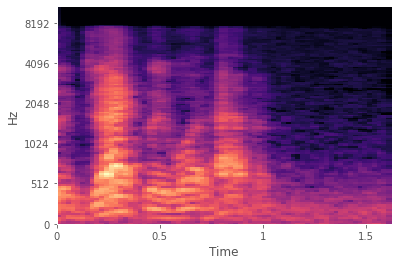

In [46]:
path = np.array(df["Path"][df["Emotion"] == "happy"])[555]

data, sample_rate = librosa.load(path, duration=3, offset=0.6)
mel = create_mel_spectrogram(data, sample_rate)
librosa.display.specshow(mel, x_axis="time", y_axis="mel", sr=sample_rate, cmap="magma")
target = np.zeros((128, 150), dtype=mel.dtype)
t = np.pad(mel, ((0,0),(0,3)), mode='constant', constant_values=-99)
t

/home/kenterbery/anaconda3/envs/speech_emotion_recognition/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/kenterbery/anaconda3/envs/speech_emotion_recognition/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


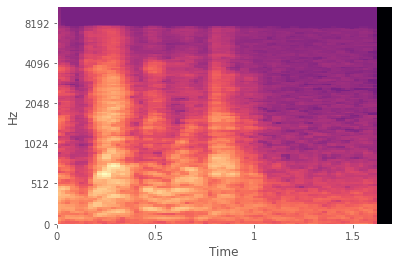

In [47]:
librosa.display.specshow(t, x_axis="time", y_axis="mel", sr=sample_rate, cmap="magma")




### Data augmentation

In [161]:
def noise(data, rate=0.035):
    noise_amp = rate*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data, rate=1000):
    shift_range = int(np.random.uniform(low=-5, high = 5)*rate)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [162]:
output_path = "/home/kenterbery/projects/speech_emotion_recognition/spectrograms/"

def get_specs(path, label, output_path=output_path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.6)

     # without augmentation
    out = output_path + label + "/" + str(hash(path))
    create_spectrogram_plot(data, output_path=out)
    # result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    out = output_path + label + "/" + str(hash(path) + hash("noise"))
    create_spectrogram_plot(noise_data, output_path=out)
    # result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    out = output_path + label + "/" + str(hash(path) + hash("stretch_pitch"))
    create_spectrogram_plot(data_stretch_pitch, output_path=out)
    # result = np.vstack((result, res3)) # stacking vertically

In [163]:
print("Start processing...")
for path, emotion, ind in zip(df.Path, df.Emotion, range(df.Path.shape[0])):
    get_specs(path, emotion)
    if ind % 500 == 0 and ind != 0:
        print(f"{ind} samples has been processed...")
print("Done.")

Start processing...
500 samples has been processed...
1000 samples has been processed...
1500 samples has been processed...
2000 samples has been processed...
2500 samples has been processed...
3000 samples has been processed...
3500 samples has been processed...
4000 samples has been processed...
4500 samples has been processed...
5000 samples has been processed...
5500 samples has been processed...
6000 samples has been processed...
6500 samples has been processed...
7000 samples has been processed...
7500 samples has been processed...
8000 samples has been processed...
8500 samples has been processed...
9000 samples has been processed...
9500 samples has been processed...
10000 samples has been processed...
10500 samples has been processed...
11000 samples has been processed...
11500 samples has been processed...
12000 samples has been processed...
Done.


In [54]:
import os

len(os.listdir("spectrograms/"))

7